<a href="https://colab.research.google.com/github/mohammedahsantauqeer/heart/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   52    1   0       125   212    0        1      168      0      1.0  ...   
1   53    1   0       140   203    1        0      155      1      3.1  ...   
2   70    1   0       145   174    0        1      125      1      2.6  ...   
3   61    1   0       148   203    0        1      161      0      0.0  ...   
4   62    0   0       138   294    1        1      106      0      1.9  ...   

   thal  target  age_chol_interaction  age_group_30-40  age_group_40-50  \
0     3       0                 11024            False            False   
1     3       0                 10759            False            False   
2     3       0                 12180            False            False   
3     3       0                 12383            False            False   
4     2       0                 18228            False            False   

   age_group_50-60  age_group_60-70  age_group_70+  bp_category_Low  \
0  

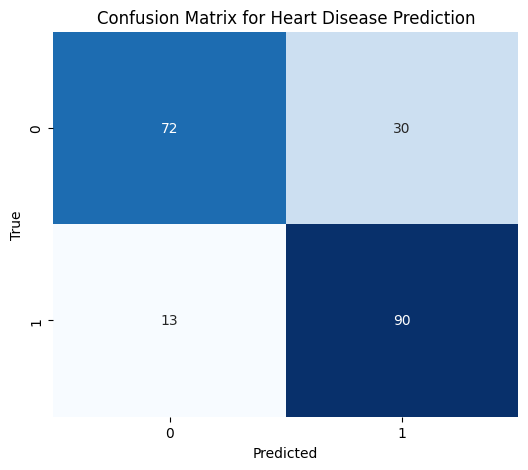

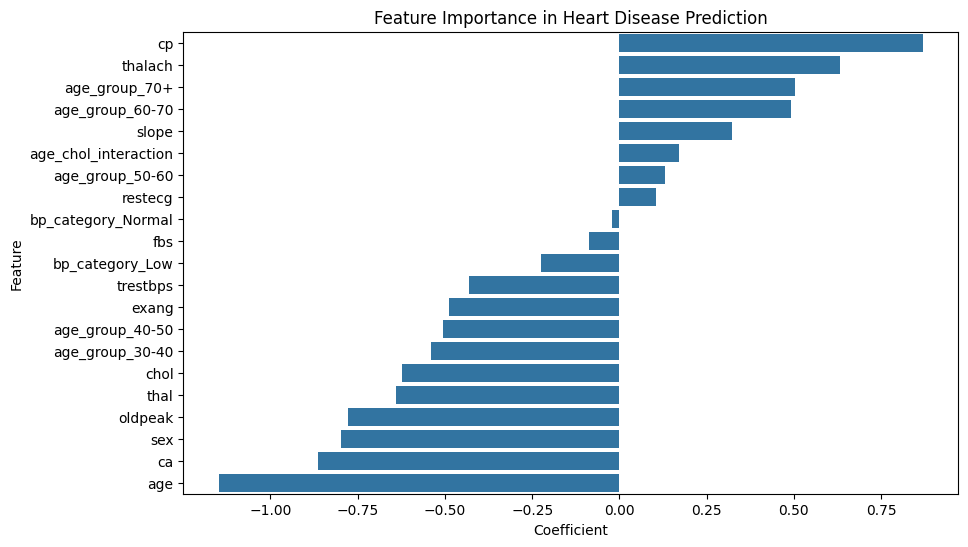

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('heart.csv')

df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 100], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

def categorize_blood_pressure(bp):
    if bp < 120:
        return 'Low'
    elif 120 <= bp < 140:
        return 'Normal'
    else:
        return 'High'

df['bp_category'] = df['trestbps'].apply(categorize_blood_pressure)

df['age_chol_interaction'] = df['age'] * df['chol']

df = pd.get_dummies(df, columns=['age_group', 'bp_category'], drop_first=True)

print(df.head())

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Heart Disease Prediction')
plt.show()
